# 線形分類問題　多クラス分類

## データセットの作成

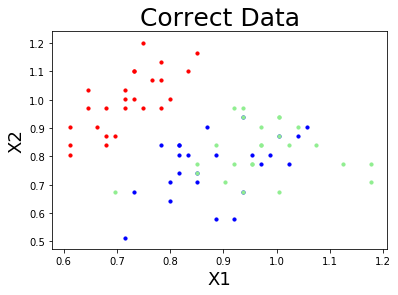

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn.datasets as datasets

#色の定義
colors=("red","blue","lightgreen","gray","cyan")

#アイリスデータセットの読み込み
iris = datasets.load_iris()
input_data = iris.data
ave = np.average(input_data,axis=0)
std = np.std(input_data,axis=0)
input_data = (input_data-std)/ave
#入力データ
X = iris.data[0:150:2,:2]
X_test = iris.data[1:150:2,:2]
X = input_data[0:150:2,:2]
X_test = input_data[1:150:2,:2]
#正解データ
T_vector = iris.target[0:150:2]
T_test_vector = iris.target[1:150:2]

T = np.eye(len(np.unique(T_vector)))[T_vector]
T_test = np.eye(len(np.unique(T_vector)))[T_test_vector]

#プロットを行う
#↓X,Tをもとに色付きの点をプロットする
for i in np.unique(T_vector):
    plt.scatter(x=X[T_vector==i,0],y=X[T_vector==i,1],s=10,c=colors[i])
plt.title("Correct Data",fontsize=25)
plt.xlabel("X1",fontsize=18)
plt.ylabel("X2",fontsize=18)
plt.show()

In [4]:
#ソフトマックス関数の作成
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

#クロスエントロピー誤差の関数を作成
def cross_entropy(Y,T):
    return -np.sum(T*np.log(Y+1e-7))

#重みを生成(初期値を平均0，分散1の乱数で生成)
W = np.random.randn(2,len(np.unique(T_vector)))
#バイアスを生成(初期値を平均0，分散1の乱数で生成)
B = np.random.randn(1,len(np.unique(T_vector)))
#学習率の設定
eta = 0.001
#イテレーション数の設定
iteration = 10000
#損失の推移保存リスト
E_save = np.array([])
#test損失の推移保存リスト
E_save_test = np.array([])

#学習
for i in range(iteration):
    
    #--順伝番 Forward propagation--
    #↓出力の計算
    Y = softmax(np.dot(X,W)+B)
    Y_test = softmax(np.dot(X_test,W)+B)
    
    #--逆伝番 Backward propagation--
    #↓損失の計算(クロスエントロピー誤差を用いる)
    E = cross_entropy(Y,T)
    E_test = cross_entropy(Y_test,T)
    #損失の保存
    E_save = np.append(E_save,E)
    E_save_test = np.append(E_save_test,E_test)
    #↓EをWで偏微分する
    dW = X.T.dot(Y-T)
    #↓EをBで偏微分する
    dB = np.sum(Y-T,axis=0,keepdims=True)
    #↓重みの更新
    W = W-eta*dW
    #↓バイアスの更新
    B = B-eta*dB

print("重みw11の値は{0:.2f}".format(W[0,0]))
print("重みw12の値は{0:.2f}".format(W[0,1]))
print("重みw21の値は{0:.2f}".format(W[1,0]))
print("重みw22の値は{0:.2f}".format(W[1,1]))
print("バイアスb1の値は{0:.2f}".format(B[0,0]))
print("バイアスb2の値は{0:.2f}".format(B[0,1]))

重みw11の値は-9.31
重みw12の値は3.31
重みw21の値は8.78
重みw22の値は-5.77
バイアスb1の値は1.29
バイアスb2の値は3.97


## 学習結果のプロット

正答率は81.3%


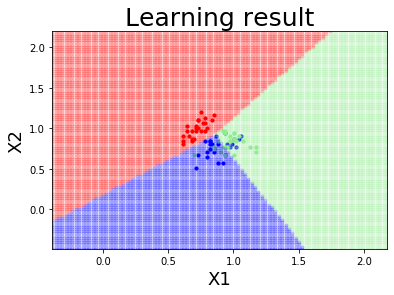

In [5]:
#グリッドの最小値と最大値の決定
#↓x1のmin値-1とmax値+1を保存する
x1_min = X[:,0].min()-1
x1_max = X[:,0].max()+1
#↓x2のmin値-1とmax値+1を保存する
x2_min = X[:,1].min()-1
x2_max = X[:,1].max()+1

#グリッドの細かさ指定
#↓x1方向に100刻み
x1_grid = np.linspace(x1_min,x1_max,100)
#↓x2方向に100刻み                    
x2_grid = np.linspace(x2_min,x2_max,100)

#グリッドをプロットするためのデータ生成
#↓xxにグリッドのx1データ，yyにグリッドのx2データを保存
xx,yy = np.meshgrid(x1_grid,x2_grid)

#xx,yyを二次配列にまとめる
#↓1列目がx1データ，2列目がx2データとなるようにまとめる
X_grid = np.c_[xx.reshape(-1),yy.reshape(-1)]

#学習結果を色で表現するためにデータを用意
#↓学習結果のyデータを生成
Y_grid = softmax(np.dot(X_grid, W)+B)
Y_test_data = softmax(np.dot(X_test, W)+B)

#↓学習結果のyデータを1次元にする
Y_grid_vector = np.argmax(Y_grid,axis=1)
Y_test_vector = np.argmax(Y_test_data,axis=1)


print("正答率は{0:.1f}%".format(np.sum(Y_test_vector==T_test_vector)/len(Y_test_vector)*100))

#プロットを行う
#↓正解データを点でプロット
for i in np.unique(T_vector):
    plt.scatter(x=X[T_vector==i,0],y=X[T_vector==i,1],s=10,c=colors[i])
#↓学習結果をグリッドでプロット
for i in np.unique(T_vector):
    plt.scatter(x=X_grid[Y_grid_vector==i,0],y=X_grid[Y_grid_vector==i,1],s=10,c=colors[i],alpha=0.2)
plt.title("Learning result",fontsize=25)
plt.xlabel("X1",fontsize=18)
plt.ylabel("X2",fontsize=18)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.show()

## 損失推移のプロット

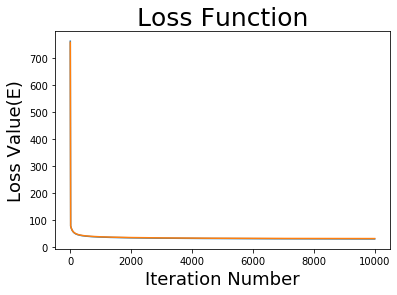

In [38]:
#プロットを行う
#↓損失とイテレーション数の関係を点でプロット
plt.plot(E_save)
plt.plot(E_save_test)
plt.title("Loss Function",fontsize=25)
plt.xlabel("Iteration Number",fontsize=18)
plt.ylabel("Loss Value(E)",fontsize=18)
plt.show()